## Second Order Non-Linear PDE

# Simple Pendulum

We will start by solving the pendulum problem. In the physics class, we often solve this problem by small angle approximation, i.e. **sin(θ)≈θ**, because otherwise, we get an elliptic integral which doesn't have an analytic solution. The linearized form is

\begin{align*}
\ddot{\theta} + \frac{g}{L}{\theta} = 0
\end{align*}

But we have numerical ODE solvers! Why not solve the real pendulum?

\begin{align*}
\ddot{\theta} + \frac{g}{L}{\sin(\theta)} = 0
\end{align*}

Notice that now we have a second order ODE. In order to use the same method as above, we nee to transform it into a system of first order ODEs by employing the notation \begin{align*}d\theta = \dot{\theta}\end{align*}˙


\begin{align*}
&\dot{\theta} = d{\theta} \\
&\dot{d\theta} = - \frac{g}{L}{\sin(\theta)}
\end{align*}

In [2]:
# Simple Pendulum Problem
using OrdinaryDiffEq, Plots

In [3]:
#Constants
const g = 9.81
L = 1.0

1.0

In [4]:
#Initial Conditions
u₀ = [0,π/2]
tspan = (0.0,6.3)

(0.0, 6.3)

In [5]:
#Define the problem
function simplependulum(du,u,p,t)
    θ = u[1]
    dθ = u[2]
    du[1] = dθ
    du[2] = -(g/L)*sin(θ)
end

simplependulum (generic function with 1 method)

In [6]:
#Pass to solvers
prob = ODEProblem(simplependulum, u₀, tspan)
sol = solve(prob,Tsit5())


retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 33-element Array{Float64,1}:
 0.0
 0.0006362147454811361
 0.006998362200292497
 0.03660216163106764
 0.09522902219251353
 0.17748934143704403
 0.28383651258932113
 0.4185306072846652
 0.5722776233287755
 0.7241766146049302
 0.9174446169707251
 1.1209186158634628
 1.3105830422022744
 ⋮
 3.5612252549943766
 3.838801946817698
 4.105096208899116
 4.380340406840845
 4.652298367277547
 4.920576028383644
 5.2032032750663975
 5.464437993309338
 5.752593635973691
 6.003097753410705
 6.298729015398541
 6.3
u: 33-element Array{Array{Float64,1},1}:
 [0.0, 1.5707963267948966]
 [0.0009993631238780826, 1.5707932081482545]
 [0.010992121372010251, 1.5704189893030465]
 [0.05736870622276341, 1.560488254247696]
 [0.14737974825321118, 1.5015676987217073]
 [0.2647112634453346, 1.335664195671971]
 [0.38987225826000127, 0.9975315668974589]
 [0.4872545616262898, 0.42901689169645796]
 [0.4976251735788483, -0.29640881160712784]
 [0.400

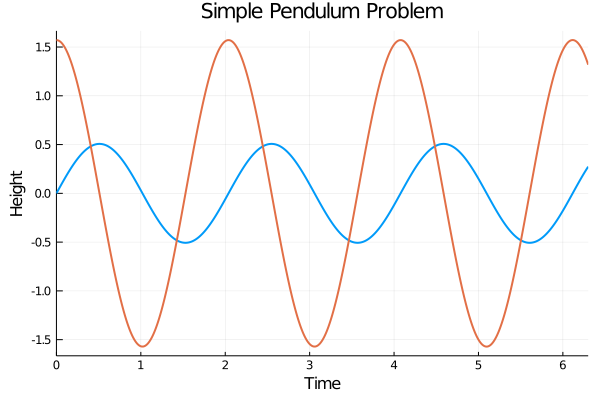

In [7]:
#Plot
plot(sol,linewidth=2,title ="Simple Pendulum Problem", xaxis = "Time", yaxis = "Height", label = ["\\theta" "d\\theta"])

So now we know that behaviour of the position versus time. However, it will be useful to us to look at the phase space of the pendulum, i.e., and representation of all possible states of the system in question (the pendulum) by looking at its velocity and position. Phase space analysis is ubiquitous in the analysis of dynamical systems, and thus we will provide a few facilities for it.

In [8]:
p = plot(sol,vars = (1,2), xlims = (-9,9), title = "Phase Space Plot", xaxis = "Velocity", yaxis = "Position", leg=false)
function phase_plot(prob, u0, p, tspan=2pi)
    _prob = ODEProblem(prob.f,u0,(0.0,tspan))
    sol = solve(_prob,Vern9()) # Use Vern9 solver for higher accuracy
    plot!(p,sol,vars = (1,2), xlims = nothing, ylims = nothing)
end

phase_plot (generic function with 2 methods)

In [9]:
for i in -4pi:pi/2:4π
    for j in -4pi:pi/2:4π
        phase_plot(prob, [j,i], p)
    end
end

In [10]:
plot(p,xlims = (-9,9))